In [12]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

In [13]:
maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['.', 'O', 'O', '.', '.', '.', '.', '.']

□ □ □ □ □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ X


In [14]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = True,)

In [15]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 1000
exploit = 1000
print("Starting XCS")
df = XCSExp(
    maze=maze,
    cfg=XCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=False

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [16]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df_all['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df_all['fraction_accuracy_update']=df_update['fraction_accuracy']
df_all['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df_all['fraction_accuracy_both']=df_both['fraction_accuracy']

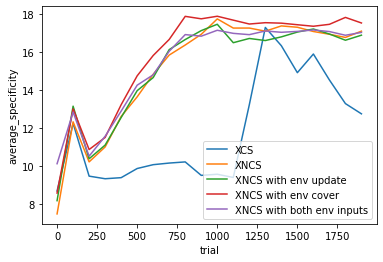

In [17]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

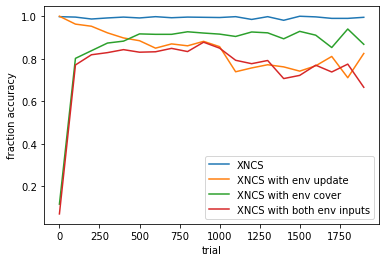

In [18]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

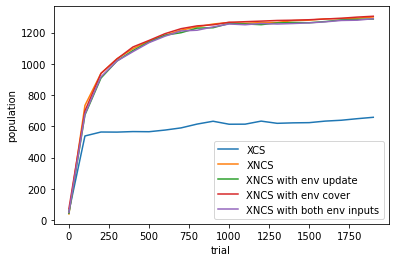

In [19]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

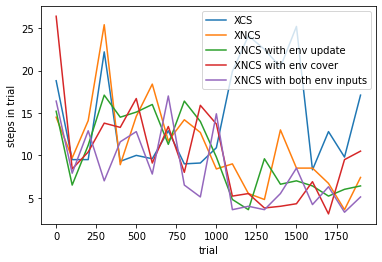

In [20]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [21]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

29.090000000000003
21.96
20.27
20.19
16.4


In [22]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,steps_in_trial_both,...,population_cover,population_both,average_specificity_no_mods,average_specificity_update,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both
trial,,,,,,,,,,,,,,,,,,,,,
0,18.8,1000.000000,0.009595,52.9,53.5,8.699444,14.5,15.2,26.4,16.4,...,72.1,48.4,7.493962,8.191041,8.589860,10.134139,0.998,1.000,0.116699,0.07085
100,9.5,1401.484342,0.077549,538.1,1600.0,12.256375,9.7,6.5,8.4,7.9,...,698.6,677.9,12.336967,13.160747,13.018353,12.852362,0.996,0.963,0.802000,0.77100
200,9.5,1249.588408,0.065521,563.4,1600.0,9.480813,14.1,11.2,10.4,12.9,...,938.7,916.5,10.230375,10.394875,10.879812,10.530125,0.987,0.953,0.838000,0.81900
300,22.2,989.924691,0.173920,562.8,1600.0,9.344188,25.4,17.1,13.8,7.0,...,1031.5,1018.4,11.016188,11.113500,11.515813,11.579125,0.992,0.922,0.874000,0.82900
400,9.3,1278.489603,0.086630,566.2,1600.0,9.400562,8.9,14.5,13.3,11.6,...,1108.5,1078.3,12.619125,12.565438,13.236938,12.902125,0.996,0.898,0.883000,0.84300
500,10.0,1346.944083,0.075711,565.3,1600.0,9.881688,14.6,15.1,16.7,12.8,...,1150.0,1136.0,13.650687,13.976313,14.756000,14.264000,0.992,0.885,0.917000,0.83100
600,9.6,1267.189177,0.079716,575.9,1600.0,10.083562,18.4,16.0,9.1,7.8,...,1193.5,1177.4,14.837688,14.664937,15.825563,14.810937,0.998,0.850,0.915000,0.83300
700,12.9,1135.043588,0.115464,589.8,1600.0,10.168500,11.7,11.3,13.4,17.0,...,1225.5,1210.9,15.848250,16.135125,16.670250,16.049812,0.993,0.870,0.915000,0.84900
800,9.0,1224.173095,0.093796,614.2,1600.0,10.228938,14.2,16.4,8.0,6.5,...,1243.4,1215.5,16.376875,16.664500,17.884625,16.925250,0.996,0.861,0.927000,0.83400


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,14.5,900.000000,0.009549,39.9,38.7,7.493962,0.998
100,9.7,1447.022405,0.077211,1333.5,733.6,12.336967,0.996
200,14.1,1254.887166,0.179498,1600.0,939.1,10.230375,0.987
300,25.4,1081.838483,0.412204,1600.0,1032.6,11.016188,0.992
400,8.9,1214.170493,0.140844,1600.0,1097.4,12.619125,0.996
500,14.6,1095.214666,0.234140,1600.0,1145.7,13.650687,0.992
600,18.4,1144.253687,0.317876,1600.0,1182.4,14.837688,0.998
700,11.7,1191.811579,0.216060,1600.0,1216.0,15.848250,0.993
800,14.2,1141.992875,0.252691,1600.0,1236.9,16.376875,0.996


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,15.2,1000.000000,0.009437,43.4,42.7,8.191041,1.000
100,6.5,1275.621012,0.038644,1230.8,672.8,13.160747,0.963
200,11.2,1211.859556,0.121210,1600.0,909.0,10.394875,0.953
300,17.1,1006.874827,0.225228,1600.0,1018.6,11.113500,0.922
400,14.5,1224.684568,0.202540,1600.0,1085.5,12.565438,0.898
500,15.1,1085.700859,0.223366,1600.0,1140.1,13.976313,0.885
600,16.0,1002.165613,0.249547,1600.0,1183.8,14.664937,0.850
700,11.3,1236.477106,0.175480,1600.0,1199.6,16.135125,0.870
800,16.4,1095.041727,0.257612,1600.0,1228.9,16.664500,0.861


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,26.4,1000.000000,0.016119,73.6,72.1,8.589860,0.116699
100,8.4,1221.669451,0.057126,1273.9,698.6,13.018353,0.802000
200,10.4,1246.272006,0.138206,1600.0,938.7,10.879812,0.838000
300,13.8,1358.774050,0.169118,1600.0,1031.5,11.515813,0.874000
400,13.3,1150.131556,0.193538,1600.0,1108.5,13.236938,0.883000
500,16.7,1138.237237,0.272251,1600.0,1150.0,14.756000,0.917000
600,9.1,1343.110549,0.185532,1600.0,1193.5,15.825563,0.915000
700,13.4,1103.825693,0.237226,1600.0,1225.5,16.670250,0.915000
800,8.0,1232.469702,0.124556,1600.0,1243.4,17.884625,0.927000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,16.4,1000.000000,0.009913,49.3,48.4,10.134139,0.07085
100,7.9,1361.271487,0.060853,1211.2,677.9,12.852362,0.77100
200,12.9,1212.254701,0.161913,1600.0,916.5,10.530125,0.81900
300,7.0,1391.110547,0.101733,1600.0,1018.4,11.579125,0.82900
400,11.6,1189.616061,0.196893,1600.0,1078.3,12.902125,0.84300
500,12.8,1080.610024,0.213625,1600.0,1136.0,14.264000,0.83100
600,7.8,1296.385204,0.137334,1600.0,1177.4,14.810937,0.83300
700,17.0,1107.833345,0.321735,1600.0,1210.9,16.049812,0.84900
800,6.5,1355.103457,0.094710,1600.0,1215.5,16.925250,0.83400
